In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import scipy
import statsmodels.api as sm
import calendar
!pip install cartopy
import cartopy.crs as ccrs
import re 
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('V3.0_cleaned_Covid_19_National_Statistics.csv')
df

,reportdt,newCases,activeCases,totalRecoveries,cumulativeCases,deathDay,totalDeaths,broughtDead,test24hours,totalTests,testsPositivity,vaccinated24hours,totalVaccinations,fullyVaccinated
0,2020-03-18,0,2,0,2,0,0,0,28,28,0,0,0,0
1,2020-03-19,0,2,0,2,0,0,0,33,61,0,0,0,0
2,2020-03-20,0,2,0,2,0,0,0,25,86,0,0,0,0
3,2020-03-22,1,3,0,3,0,0,0,17,103,5,0,0,0
4,2020-03-23,0,3,0,3,0,0,0,0,103,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,2023-07-17,10,320,344683,349073,0,4070,0,696,3777127,1,363,9995305,9315371
962,2023-07-18,25,310,344718,349098,0,4070,0,1029,3778156,2,392,9995697,9315763
963,2023-07-20,20,272,344800,349142,0,4070,0,1558,3779714,1,2646,9998343,9318682
964,2023-07-21,15,224,344861,349157,2,4072,1,1356,3781070,1,1486,9999829,9320168


In [3]:
df.isnull().sum()

reportdt             0
newCases             0
activeCases          0
totalRecoveries      0
cumulativeCases      0
deathDay             0
totalDeaths          0
broughtDead          0
test24hours          0
totalTests           0
testsPositivity      0
vaccinated24hours    0
totalVaccinations    0
fullyVaccinated      0
dtype: int64

In [4]:
df.columns

Index(['reportdt', 'newCases', 'activeCases', 'totalRecoveries',
       'cumulativeCases', 'deathDay', 'totalDeaths', 'broughtDead',
       'test24hours', 'totalTests', 'testsPositivity', 'vaccinated24hours',
       'totalVaccinations', 'fullyVaccinated'],
      dtype='object')

In [5]:
df.dtypes

reportdt             object
newCases              int64
activeCases           int64
totalRecoveries       int64
cumulativeCases       int64
deathDay              int64
totalDeaths           int64
broughtDead           int64
test24hours           int64
totalTests            int64
testsPositivity       int64
vaccinated24hours     int64
totalVaccinations     int64
fullyVaccinated       int64
dtype: object

In [6]:
df.describe()

,newCases,activeCases,totalRecoveries,cumulativeCases,deathDay,totalDeaths,broughtDead,test24hours,totalTests,testsPositivity,vaccinated24hours,totalVaccinations,fullyVaccinated
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.00000,966.000000,966.000000,9.660000e+02,966.000000,966.000000,9.660000e+02,9.660000e+02
mean,349.301242,2771.385093,162648.580745,167716.140787,4.236025,2295.65942,0.377847,3915.508282,1.916068e+06,6.595238,10353.694617,2.319917e+06,1.704359e+06
std,700.373408,5331.317057,130226.982429,132017.408977,10.231628,1675.73670,2.071040,3143.461534,1.378590e+06,7.676405,21567.038490,3.404461e+06,2.771252e+06
min,0.000000,2.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,2.800000e+01,0.000000,-105.000000,0.000000e+00,0.000000e+00
25%,29.000000,358.000000,17090.000000,17707.500000,0.000000,358.75000,0.000000,1461.750000,4.088352e+05,1.000000,0.000000,0.000000e+00,0.000000e+00
50%,90.000000,808.000000,186723.500000,195456.000000,1.000000,3382.50000,0.000000,3209.000000,2.073058e+06,4.000000,1899.500000,4.279395e+05,1.447125e+05
75%,246.500000,2222.500000,312101.750000,316824.250000,3.000000,3966.00000,0.000000,5630.750000,3.334360e+06,9.000000,12765.500000,3.459584e+06,2.196664e+06
max,5555.000000,34304.000000,345069.000000,349224.000000,72.000000,4072.00000,28.000000,16774.000000,3.782381e+06,51.000000,281196.000000,1.000167e+07,9.327654e+06


In [7]:
# Converting 'Date' column to datetime
df['reportdt'] = pd.to_datetime(df['reportdt'])

# Extracting year, month, and day
df['Year'] = df['reportdt'].dt.year
df['Month'] = df['reportdt'].dt.month
df['Day'] = df['reportdt'].dt.day


df.head()


,reportdt,newCases,activeCases,totalRecoveries,cumulativeCases,deathDay,totalDeaths,broughtDead,test24hours,totalTests,testsPositivity,vaccinated24hours,totalVaccinations,fullyVaccinated,Year,Month,Day
0,2020-03-18,0,2,0,2,0,0,0,28,28,0,0,0,0,2020,3,18
1,2020-03-19,0,2,0,2,0,0,0,33,61,0,0,0,0,2020,3,19
2,2020-03-20,0,2,0,2,0,0,0,25,86,0,0,0,0,2020,3,20
3,2020-03-22,1,3,0,3,0,0,0,17,103,5,0,0,0,2020,3,22
4,2020-03-23,0,3,0,3,0,0,0,0,103,0,0,0,0,2020,3,23


In [8]:
# Assuming 'Year' column already exists in  DataFrame
unique_years = df['Year'].unique()
print("List of unique years:", unique_years)


List of unique years: [2020 2021 2022 2023]


In [9]:
# Converting 'reportdt' column to datetime
df['reportdt'] = pd.to_datetime(df['reportdt'])

# Extracting year, month, and day into separate columns
df['Year'] = df['reportdt'].dt.year
df['Month'] = df['reportdt'].dt.month
df['Day'] = df['reportdt'].dt.day

# Droping the original 'reportdt' column
df.drop(columns=['reportdt'], inplace=True)

# Printing the updated DataFrame
df.head()


,newCases,activeCases,totalRecoveries,cumulativeCases,deathDay,totalDeaths,broughtDead,test24hours,totalTests,testsPositivity,vaccinated24hours,totalVaccinations,fullyVaccinated,Year,Month,Day
0,0,2,0,2,0,0,0,28,28,0,0,0,0,2020,3,18
1,0,2,0,2,0,0,0,33,61,0,0,0,0,2020,3,19
2,0,2,0,2,0,0,0,25,86,0,0,0,0,2020,3,20
3,1,3,0,3,0,0,0,17,103,5,0,0,0,2020,3,22
4,0,3,0,3,0,0,0,0,103,0,0,0,0,2020,3,23


In [10]:
df.columns

Index(['newCases', 'activeCases', 'totalRecoveries', 'cumulativeCases',
       'deathDay', 'totalDeaths', 'broughtDead', 'test24hours', 'totalTests',
       'testsPositivity', 'vaccinated24hours', 'totalVaccinations',
       'fullyVaccinated', 'Year', 'Month', 'Day'],
      dtype='object')

# New Cases

In [11]:
# Group by year and sum total active cases for each year
total_new_cases_per_year = df.groupby('Year')['newCases'].sum()

total_new_cases_per_year

Year
2020     20502
2021    235624
2022     77384
2023      3915
Name: newCases, dtype: int64

In [12]:
# Group by year and month, and sum total new cases for each month of each year
total_new_cases_per_month_per_year = df.groupby(['Year', 'Month'])['newCases'].sum().reset_index()

# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_new_cases_per_month_per_year['Month'] = total_new_cases_per_month_per_year['Month'].map(month_name_map)

# Converting'Month' column to a categorical type with the correct order
total_new_cases_per_month_per_year['Month'] = pd.Categorical(total_new_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get new cases per month for each year
pivot_table = total_new_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='newCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

pivot_table


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2020,0,0,34,67,951,367,4369,6086,2662,1673,1215,3078
2021,33492,24317,9884,3349,3511,61745,40868,10511,2719,688,435,44105
2022,50773,7706,3962,2743,1912,3752,3926,1890,492,51,0,177
2023,0,0,187,148,257,2595,728,0,0,0,0,0


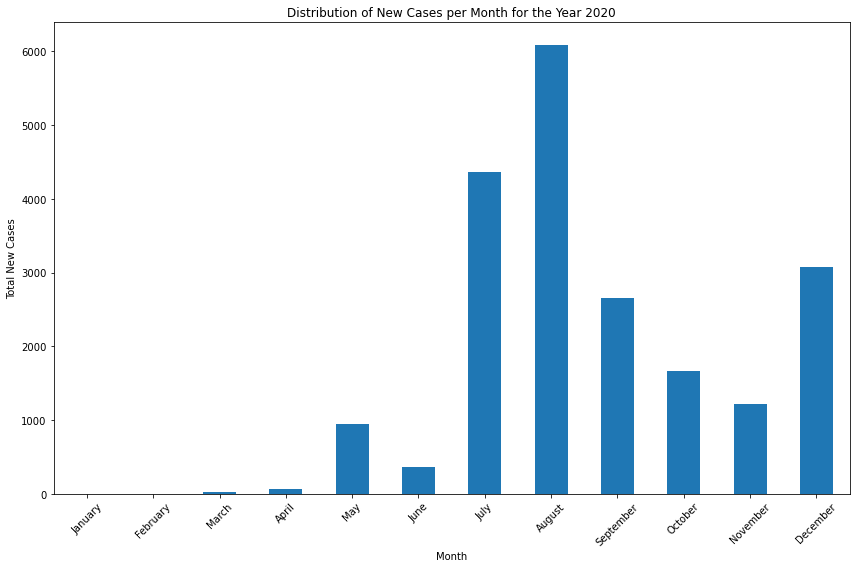

In [13]:
# Filter for the year 2020
cases_2020 = pivot_table.loc[2020]

# Plotting the class distribution for the year 2020
plt.figure(figsize=(12, 8))
cases_2020.plot(kind='bar')
plt.title('Distribution of New Cases per Month for the Year 2020')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

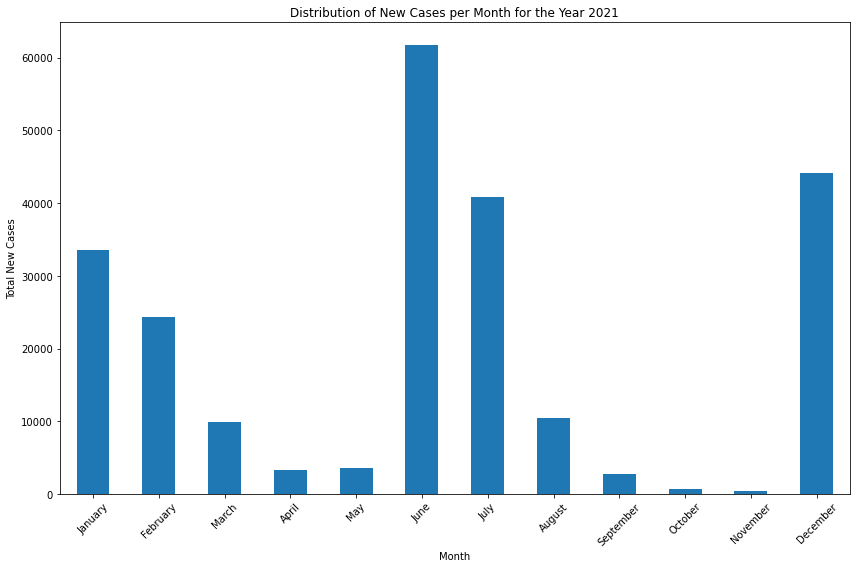

In [14]:
# Filter for the year 2021
cases_2021 = pivot_table.loc[2021]

# Plotting the class distribution for the year 2021
plt.figure(figsize=(12, 8))
cases_2021.plot(kind='bar')
plt.title('Distribution of New Cases per Month for the Year 2021')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

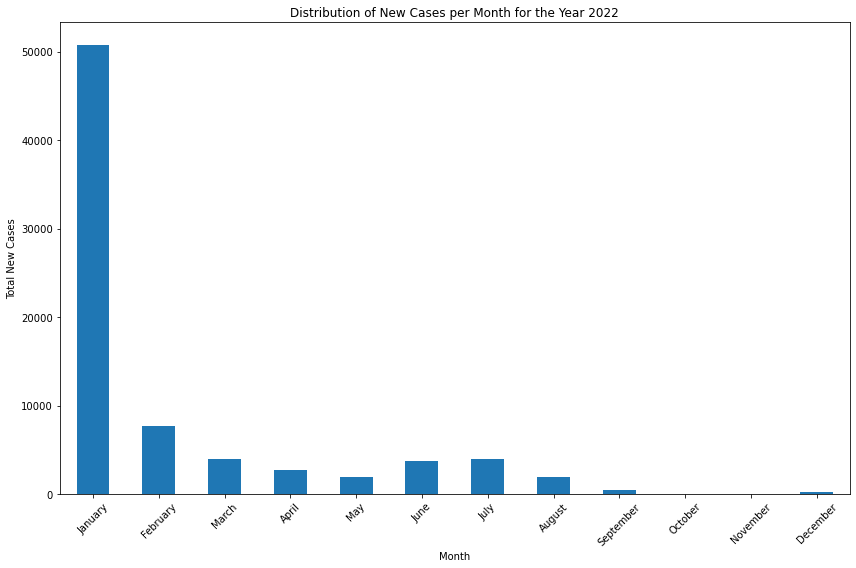

In [15]:
# Filter for the year 2021
cases_2022 = pivot_table.loc[2022]

# Plotting the class distribution for the year 2022
plt.figure(figsize=(12, 8))
cases_2022.plot(kind='bar')
plt.title('Distribution of New Cases per Month for the Year 2022')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

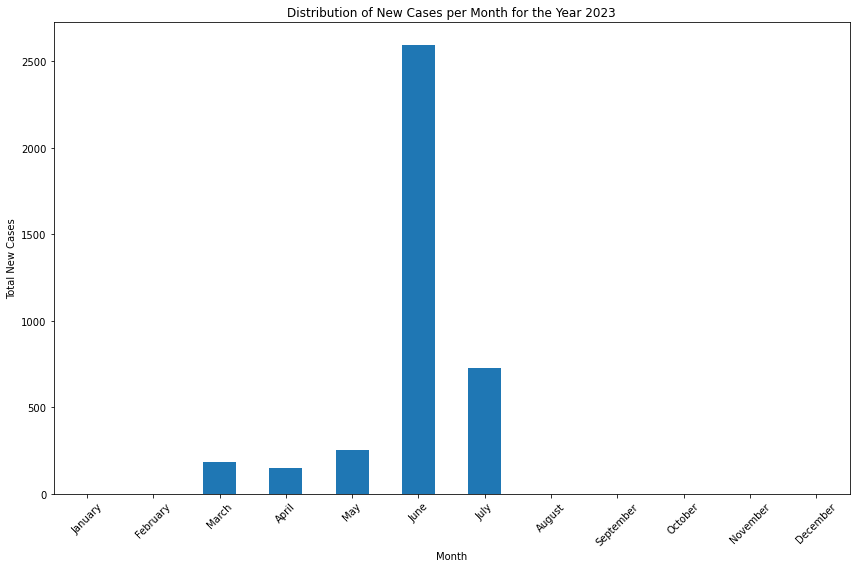

In [16]:
# Filter for the year 2021
cases_2023 = pivot_table.loc[2023]

# Plotting the class distribution for the year 2023
plt.figure(figsize=(12, 8))
cases_2023.plot(kind='bar')
plt.title('Distribution of New Cases per Month for the Year 2023')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

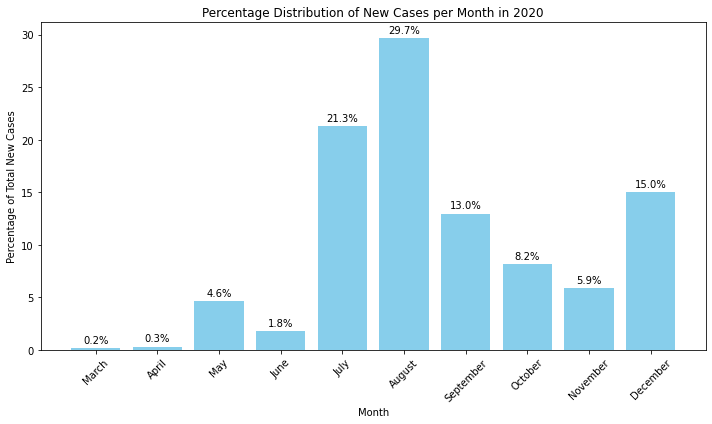

In [17]:
# Filter data for the year 2020
data_2020 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2020]

# Calculating percentage class distribution
data_2020['Percentage'] = (data_2020['newCases'] / data_2020['newCases'].sum()) * 100

# Creating a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the percentage class distribution for the year 2020
bars = ax.bar(data_2020['Month'], data_2020['Percentage'], color='skyblue')
ax.set_title('Percentage Distribution of New Cases per Month in 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total New Cases')
ax.set_xticks(range(len(data_2020['Month'])))
ax.set_xticklabels(data_2020['Month'], rotation=45)

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

plt.tight_layout()
plt.show()

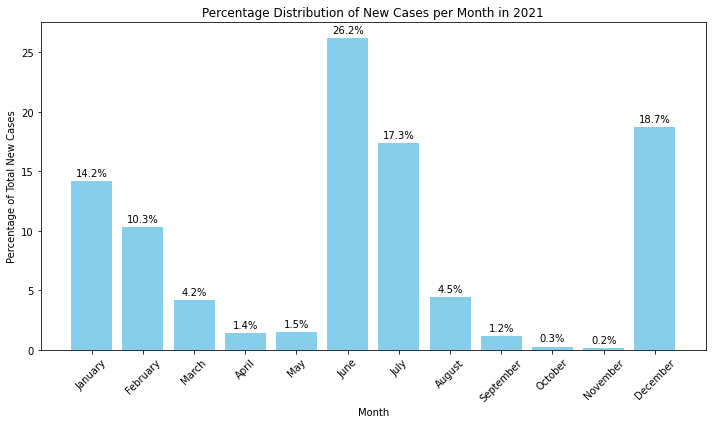

In [18]:
# Filter data for the year 2021
data_2021 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2021]

# Calculating percentage class distribution
data_2021['Percentage'] = (data_2021['newCases'] / data_2021['newCases'].sum()) * 100

# Creating a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the percentage class distribution for the year 2021
bars = ax.bar(data_2021['Month'], data_2021['Percentage'], color='skyblue')
ax.set_title('Percentage Distribution of New Cases per Month in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total New Cases')
ax.set_xticks(range(len(data_2021['Month'])))
ax.set_xticklabels(data_2021['Month'], rotation=45)

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

plt.tight_layout()
plt.show()

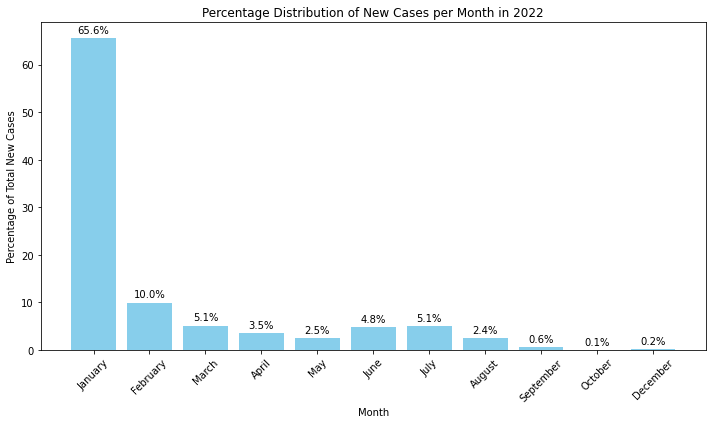

In [19]:
# Filter data for the year 2022
data_2022 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2022]

# Calculating percentage class distribution
data_2022['Percentage'] = (data_2022['newCases'] / data_2022['newCases'].sum()) * 100

# Creating a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the percentage class distribution for the year 2021
bars = ax.bar(data_2022['Month'], data_2022['Percentage'], color='skyblue')
ax.set_title('Percentage Distribution of New Cases per Month in 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total New Cases')
ax.set_xticks(range(len(data_2022['Month'])))
ax.set_xticklabels(data_2022['Month'], rotation=45)

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

plt.tight_layout()
plt.show()

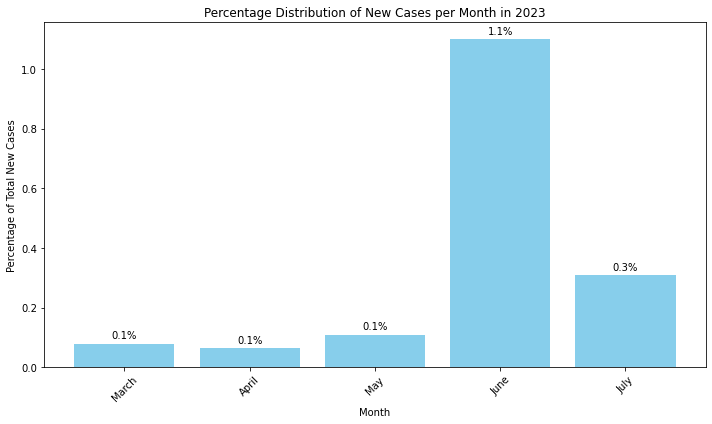

In [20]:
# Filter data for the year 2023
data_2023 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2023]

# Calculating percentage class distribution
data_2023['Percentage'] = (data_2023['newCases'] / data_2021['newCases'].sum()) * 100

# Creating a figure and an Axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the percentage class distribution for the year 2023
bars = ax.bar(data_2023['Month'], data_2023['Percentage'], color='skyblue')
ax.set_title('Percentage Distribution of New Cases per Month in 2023')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total New Cases')
ax.set_xticks(range(len(data_2023['Month'])))
ax.set_xticklabels(data_2023['Month'], rotation=45)

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

plt.tight_layout()
plt.show()

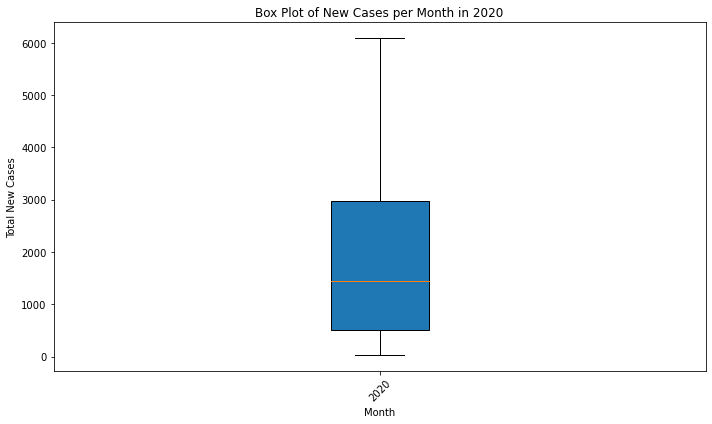

In [21]:
# Filter data for the year 2020
data_2020 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2020]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the box plot for the year 2020
ax.boxplot(data_2020['newCases'], patch_artist=True)
ax.set_title('Box Plot of New Cases per Month in 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Total New Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2020'], rotation=45)

plt.tight_layout()
plt.show()


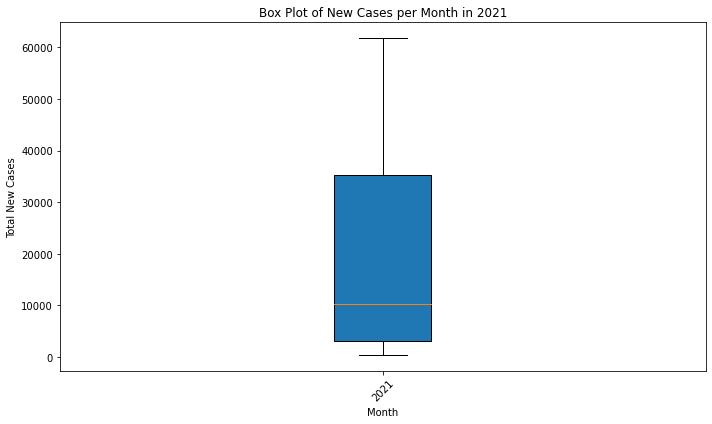

In [22]:
# Filter data for the year 2021
data_2021 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2021]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the box plot for the year 2021
ax.boxplot(data_2021['newCases'], patch_artist=True)
ax.set_title('Box Plot of New Cases per Month in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Total New Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2021'], rotation=45)

plt.tight_layout()
plt.show()

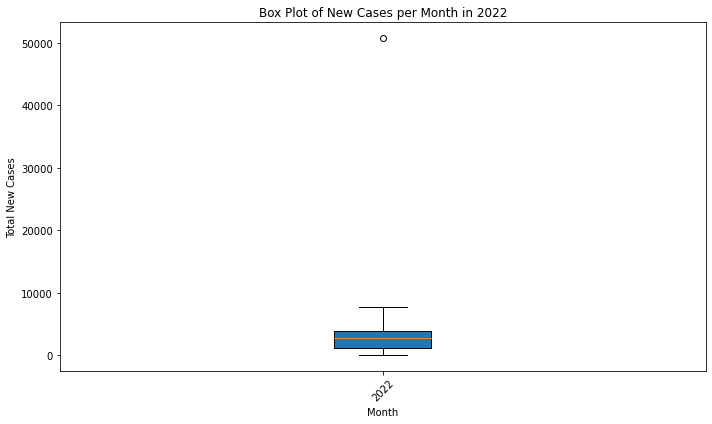

In [23]:
# Filter data for the year 2022
data_2022 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2022]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the box plot for the year 2022
ax.boxplot(data_2022['newCases'], patch_artist=True)
ax.set_title('Box Plot of New Cases per Month in 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Total New Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2022'], rotation=45)

plt.tight_layout()
plt.show()

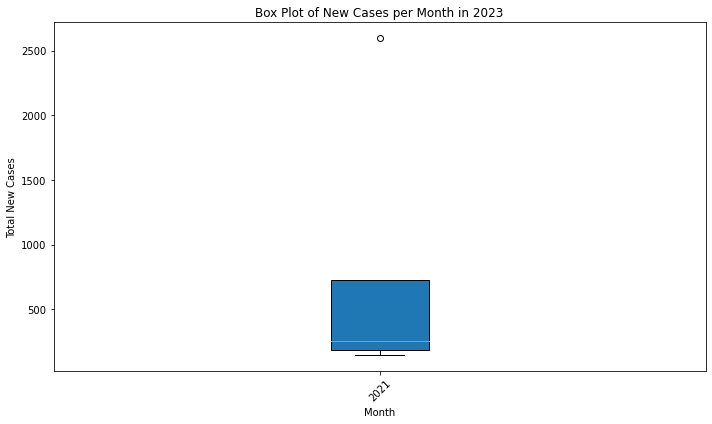

In [24]:
# Filter data for the year 2023
data_2023 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2023]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the box plot for the year 2023
ax.boxplot(data_2023['newCases'], patch_artist=True)
ax.set_title('Box Plot of New Cases per Month in 2023')
ax.set_xlabel('Month')
ax.set_ylabel('Total New Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2021'], rotation=45)

plt.tight_layout()
plt.show()

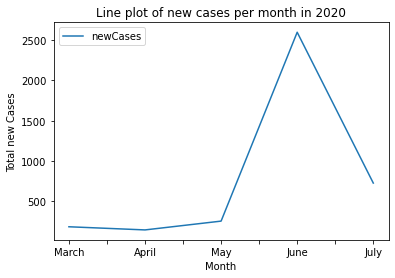

In [25]:
# Filter data for the year 2020
data_2020 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2020]

data_2023.plot.line(x='Month', y='newCases')
plt.title('Line plot of new cases per month in 2020')
plt.xlabel('Month')
plt.ylabel('Total new Cases')
plt.show()

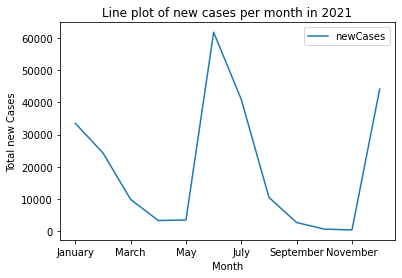

In [26]:
# Filter data for the year 2021
data_2021 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2021]

data_2021.plot.line(x='Month', y='newCases')
plt.title('Line plot of new cases per month in 2021')
plt.xlabel('Month')
plt.ylabel('Total new Cases')
plt.show()

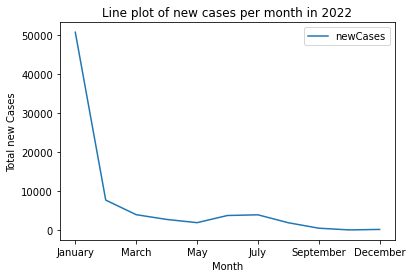

In [27]:
# Filter data for the year 2020
data_2022 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2022]

data_2022.plot.line(x='Month', y='newCases')
plt.title('Line plot of new cases per month in 2022')
plt.xlabel('Month')
plt.ylabel('Total new Cases')
plt.show()

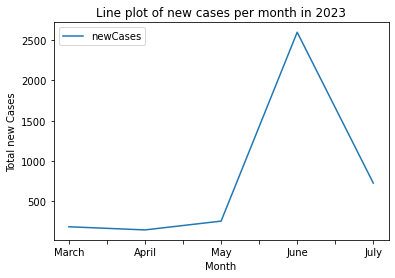

In [28]:
# Filter data for the year 2023
data_2023 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2023]

data_2023.plot.line(x='Month', y='newCases')
plt.title('Line plot of new cases per month in 2023')
plt.xlabel('Month')
plt.ylabel('Total new Cases')
plt.show()

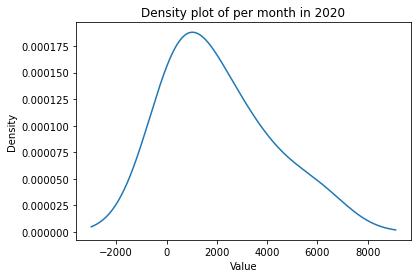

In [29]:
# Filter data for the year 2020
data_2020 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2020]
data_2020['newCases'].plot(kind='density')
plt.title('Density plot of per month in 2020')
plt.xlabel('Value')
plt.show()


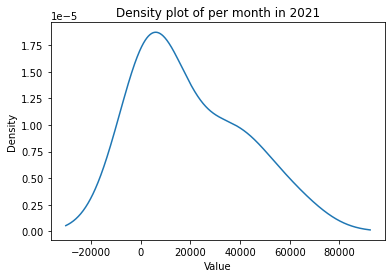

In [30]:
# Filter data for the year 2021
data_2021 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2021]
data_2021['newCases'].plot(kind='density')
plt.title('Density plot of per month in 2021')
plt.xlabel('Value')
plt.show()


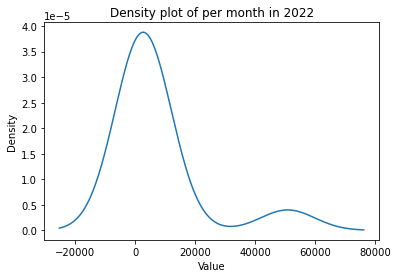

In [31]:
# Filter data for the year 2022
data_2022 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2022]
data_2022['newCases'].plot(kind='density')
plt.title('Density plot of per month in 2022')
plt.xlabel('Value')
plt.show()


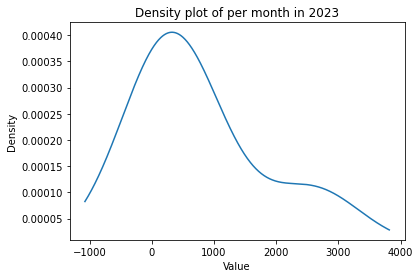

In [32]:
# Filter data for the year 2023
data_2023 = total_new_cases_per_month_per_year[total_new_cases_per_month_per_year['Year'] == 2023]
data_2023['newCases'].plot(kind='density')
plt.title('Density plot of per month in 2023')
plt.xlabel('Value')
plt.show()


# Active cases

In [33]:
# Group by year and sum total active cases for each year
total_active_cases_per_year = df.groupby('Year')['activeCases'].sum()

total_active_cases_per_year

Year
2020     147593
2021    1701974
2022     792858
2023      34733
Name: activeCases, dtype: int64

In [34]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

pivot_table

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2020,0,0,193,885,6652,4779,35333,29379,20037,15315,14503,20517
2021,217251,158792,75520,41912,21216,444444,369547,97361,27197,6252,3697,238785
2022,549619,72101,35893,23295,16333,29694,36900,22231,5655,407,0,730
2023,0,0,1533,1662,1740,19829,9969,0,0,0,0,0


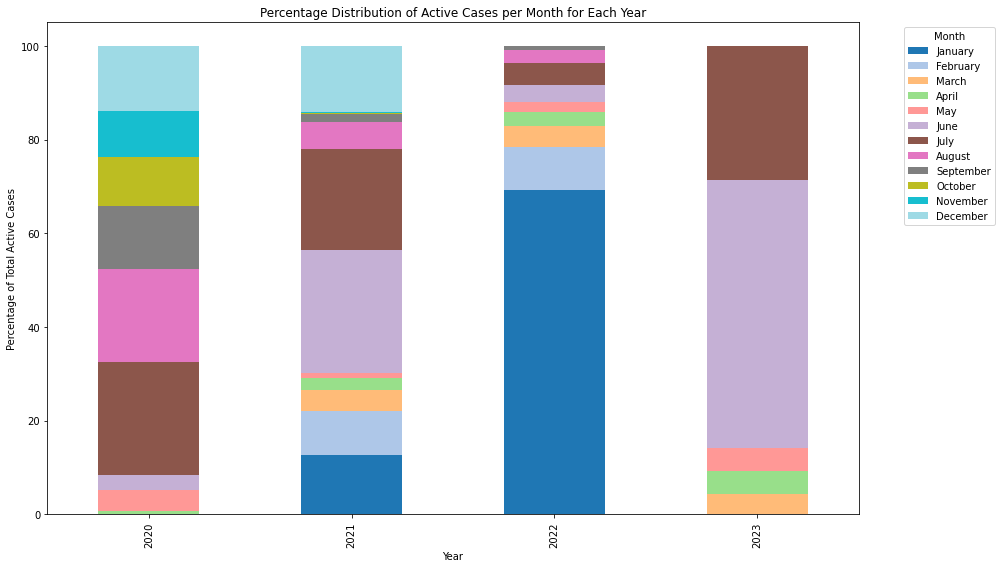

In [35]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Calculating the percentage class distribution for each year
class_distribution = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the class distribution
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar plot for class distribution
class_distribution.plot(kind='bar', stacked=True, ax=ax, cmap='tab20')

ax.set_title('Percentage Distribution of Active Cases per Month for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Active Cases')
ax.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


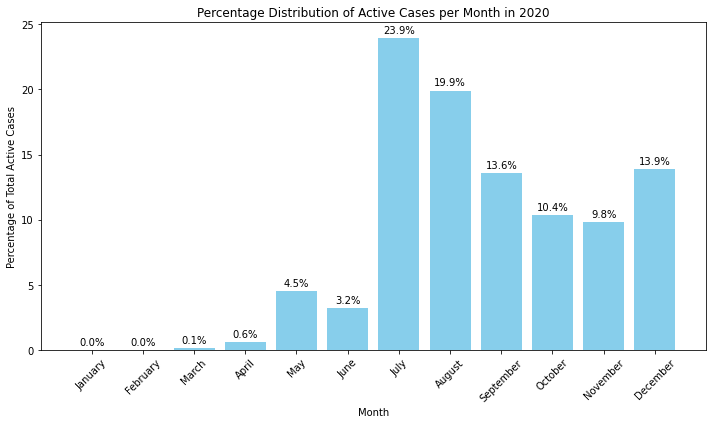

In [36]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensure columns are in the correct order
pivot_table = pivot_table[months_order]

# Filtering data for the year 2020
data_2020 = pivot_table.loc[2020]

# Calculating the percentage class distribution for the year 2020
data_2020_percentage = (data_2020 / data_2020.sum()) * 100

# Plotting the class distribution for 2020
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for class distribution
bars = ax.bar(data_2020_percentage.index, data_2020_percentage, color='skyblue')


# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')



ax.set_title('Percentage Distribution of Active Cases per Month in 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total Active Cases')
ax.set_xticks(range(len(data_2020_percentage.index)))
ax.set_xticklabels(data_2020_percentage.index, rotation=45)

plt.tight_layout()
plt.show()


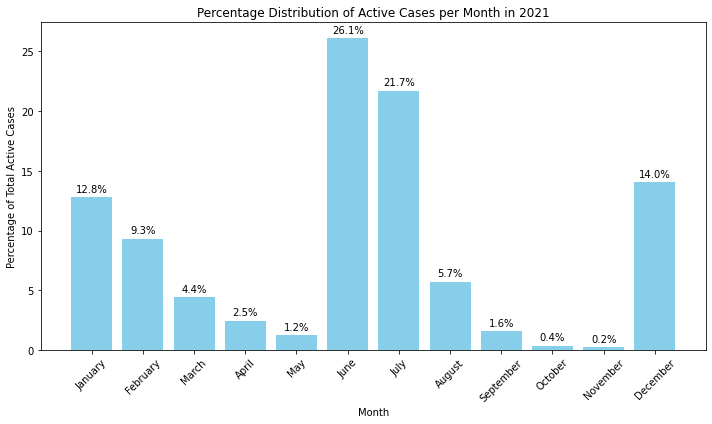

In [37]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Filter data for the year 2021
data_2021 = pivot_table.loc[2021]

# Calculating the percentage class distribution for the year 2021
data_2021_percentage = (data_2021 / data_2021.sum()) * 100

# Plotting the class distribution for 2021
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for class distribution
bars = ax.bar(data_2021_percentage.index, data_2021_percentage, color='skyblue')

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')


ax.set_title('Percentage Distribution of Active Cases per Month in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total Active Cases')
ax.set_xticks(range(len(data_2021_percentage.index)))
ax.set_xticklabels(data_2021_percentage.index, rotation=45)

plt.tight_layout()
plt.show()


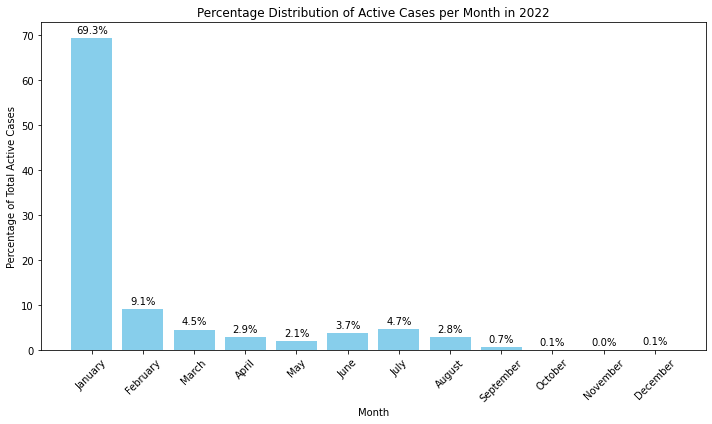

In [38]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Define the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Filter data for the year 2022
data_2022 = pivot_table.loc[2022]

# Calculating the percentage class distribution for the year 2022
data_2022_percentage = (data_2022 / data_2022.sum()) * 100

# Plotting the class distribution for 2022
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for class distribution
bars = ax.bar(data_2022_percentage.index, data_2022_percentage, color='skyblue')

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

ax.set_title('Percentage Distribution of Active Cases per Month in 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total Active Cases')
ax.set_xticks(range(len(data_2022_percentage.index)))
ax.set_xticklabels(data_2022_percentage.index, rotation=45)

plt.tight_layout()
plt.show()


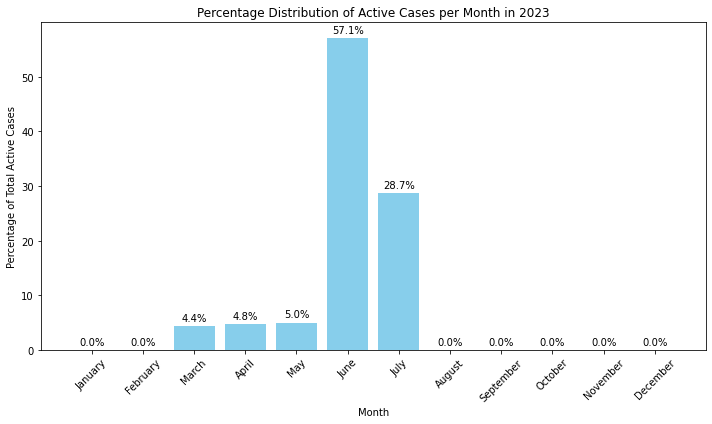

In [39]:
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Filter data for the year 2023
data_2023 = pivot_table.loc[2023]

# Calculating the percentage class distribution for the year 2023
data_2023_percentage = (data_2023 / data_2023.sum()) * 100

# Plotting the class distribution for 2023
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for class distribution
bars = ax.bar(data_2023_percentage.index, data_2023_percentage, color='skyblue')

# Adding percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', 
                va='bottom')

ax.set_title('Percentage Distribution of Active Cases per Month in 2023')
ax.set_xlabel('Month')
ax.set_ylabel('Percentage of Total Active Cases')
ax.set_xticks(range(len(data_2023_percentage.index)))
ax.set_xticklabels(data_2023_percentage.index, rotation=45)

plt.tight_layout()
plt.show()


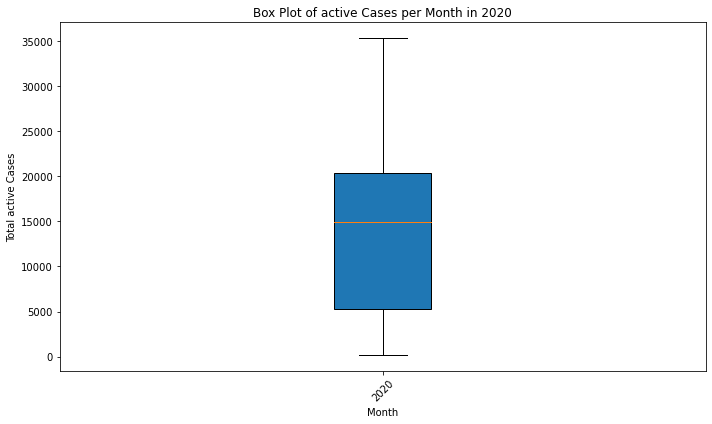

In [40]:
# Filter data for the year 2020
data_2020 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2020]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Plotting the box plot for the year 2020
ax.boxplot(data_2020['activeCases'], patch_artist=True)
ax.set_title('Box Plot of active Cases per Month in 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Total active Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2020'], rotation=45)

plt.tight_layout()
plt.show()

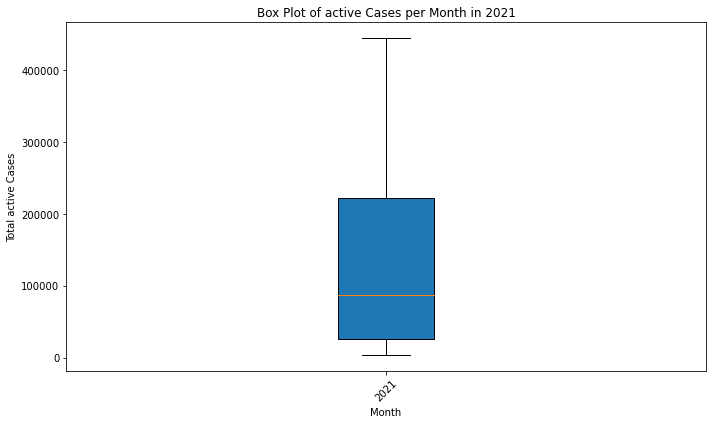

In [41]:
# Filter data for the year 2020
data_2021 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2021]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Plotting the box plot for the year 2021
ax.boxplot(data_2021['activeCases'], patch_artist=True)
ax.set_title('Box Plot of active Cases per Month in 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Total active Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2021'], rotation=45)

plt.tight_layout()
plt.show()

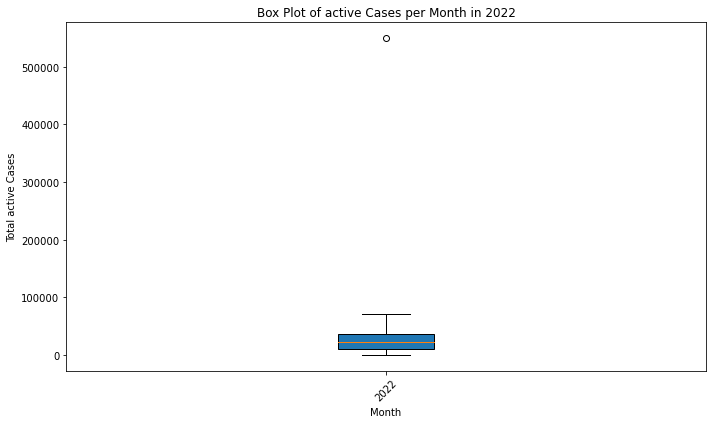

In [42]:
# Filter data for the year 2020
data_2022 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2022]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Plotting the box plot for the year 2022
ax.boxplot(data_2022['activeCases'], patch_artist=True)
ax.set_title('Box Plot of active Cases per Month in 2022')
ax.set_xlabel('Month')
ax.set_ylabel('Total active Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2022'], rotation=45)

plt.tight_layout()
plt.show()

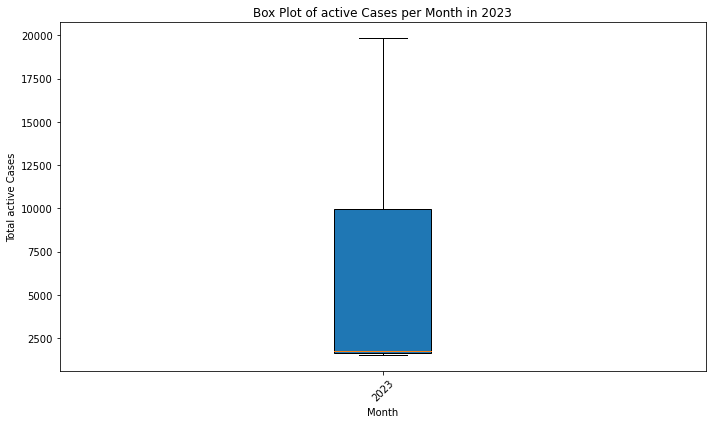

In [43]:
# Filter data for the year 2023
data_2023 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2023]

# Creating a figure and an Axes object for the box plot
fig, ax = plt.subplots(figsize=(10, 6))
# Group by year and month, and sum total active cases for each month of each year
total_active_cases_per_month_per_year = df.groupby(['Year', 'Month'])['activeCases'].sum().reset_index()

# Defining the correct order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dictionary to map month numbers to month names
month_name_map = {i + 1: month for i, month in enumerate(months_order)}

# Map month numbers to month names
total_active_cases_per_month_per_year['Month'] = total_active_cases_per_month_per_year['Month'].map(month_name_map)

# Converting 'Month' column to a categorical type with the correct order
total_active_cases_per_month_per_year['Month'] = pd.Categorical(total_active_cases_per_month_per_year['Month'], categories=months_order, ordered=True)

# Pivot the data to get active cases per month for each year
pivot_table = total_active_cases_per_month_per_year.pivot_table(index='Year', columns='Month', values='activeCases', fill_value=0)

# Ensuring columns are in the correct order
pivot_table = pivot_table[months_order]

# Plotting the box plot for the year 2023
ax.boxplot(data_2023['activeCases'], patch_artist=True)
ax.set_title('Box Plot of active Cases per Month in 2023')
ax.set_xlabel('Month')
ax.set_ylabel('Total active Cases')
ax.set_xticks([1])  # Only one box plot, so only one tick
ax.set_xticklabels(['2023'], rotation=45)

plt.tight_layout()
plt.show()

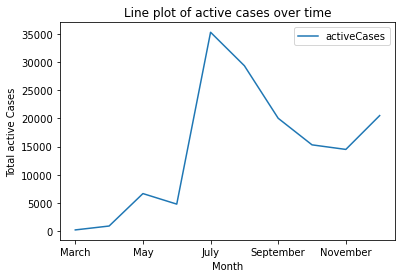

In [44]:
# Filter data for the year 2020
data_2020 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2020]
data_2020.plot.line(x='Month', y='activeCases')
plt.title('Line plot of active cases over time')
plt.xlabel('Month')
plt.ylabel('Total active Cases')
plt.show()


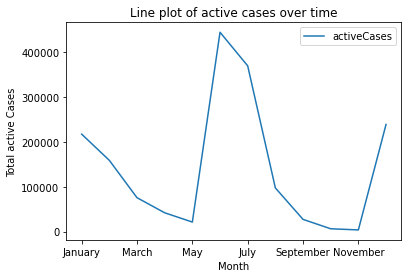

In [45]:
# Filter data for the year 2021
data_2021 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2021]
data_2021.plot.line(x='Month', y='activeCases')
plt.title('Line plot of active cases over time')
plt.xlabel('Month')
plt.ylabel('Total active Cases')
plt.show()

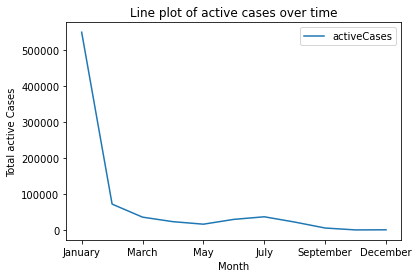

In [46]:
# Filter data for the year 2022
data_2022 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2022]
data_2022.plot.line(x='Month', y='activeCases')
plt.title('Line plot of active cases over time')
plt.xlabel('Month')
plt.ylabel('Total active Cases')
plt.show()

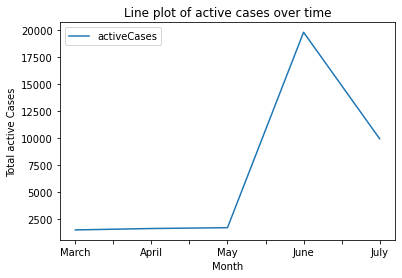

In [47]:
# Filter data for the year 2023
data_2023 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2023]
data_2023.plot.line(x='Month', y='activeCases')
plt.title('Line plot of active cases over time')
plt.xlabel('Month')
plt.ylabel('Total active Cases')
plt.show()

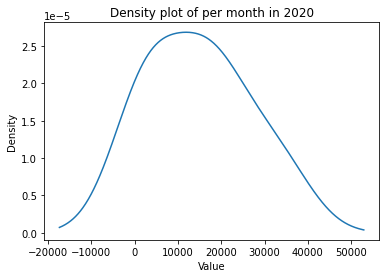

In [48]:
data_2020 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2020]
data_2020['activeCases'].plot(kind='density')
plt.title('Density plot of per month in 2020')
plt.xlabel('Value')
plt.show()


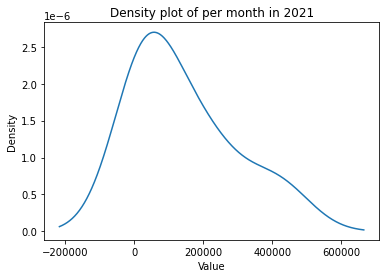

In [49]:
data_2021 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2021]
data_2021['activeCases'].plot(kind='density')
plt.title('Density plot of per month in 2021')
plt.xlabel('Value')
plt.show()

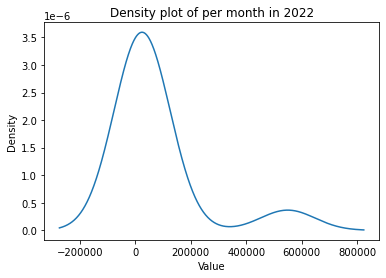

In [50]:
data_2022 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2022]
data_2022['activeCases'].plot(kind='density')
plt.title('Density plot of per month in 2022')
plt.xlabel('Value')
plt.show()

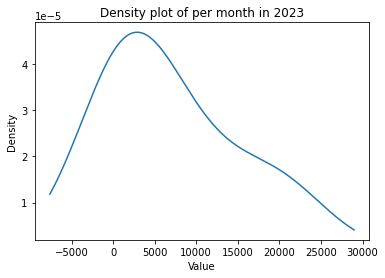

In [51]:
data_2023 = total_active_cases_per_month_per_year[total_active_cases_per_month_per_year['Year'] == 2023]
data_2023['activeCases'].plot(kind='density')
plt.title('Density plot of per month in 2023')
plt.xlabel('Value')
plt.show()